In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [4]:
data2 = loadmat('ex7data2.mat')
data2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [5]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i, :] - centroids[j, :]) **2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
                
    return idx

In [8]:
X = data2['X']
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

array([0., 2., 1.])

In [9]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1)/len(indices[0])).ravel()
    
    return centroids 

In [10]:
compute_centroids(X, idx, 3)

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

In [11]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
        
    return idx, centroids

In [12]:
idx, centroids = run_k_means(X, initial_centroids, 10)

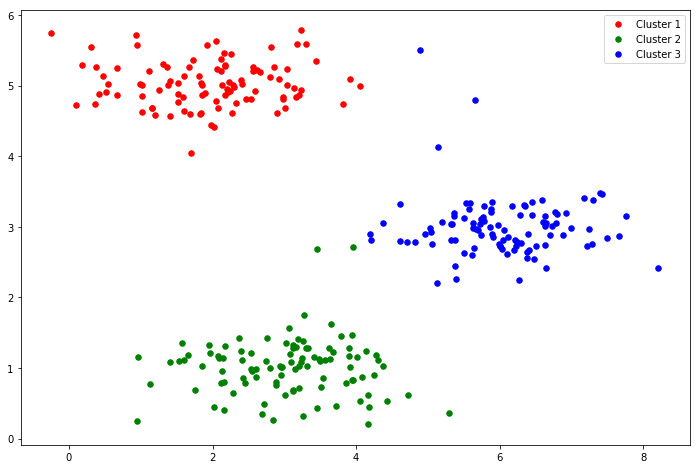

In [14]:
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()